<a href="https://colab.research.google.com/github/jcdevaney/data71200f25/blob/main/nov11/data71200nov11a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.3 MB/s eta 0:00:00


## Import Data

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, stratify=dataset.target, test_size=0.5, random_state=0)

# Decision Trees

## Classification

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

Accuracy on training set: 1.000
Accuracy on test set: 0.893
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        25
     class 2       0.87      0.80      0.83        25
     class 3       0.81      0.88      0.85        25

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



In [4]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.03846154 0.         0.96153846]


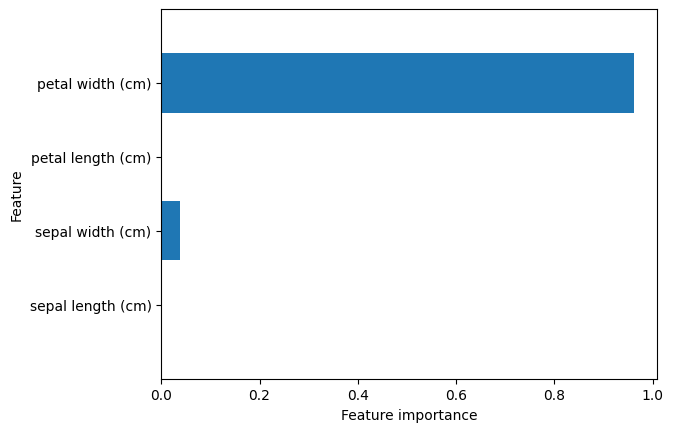

In [5]:
# plot feature importances
# assume the scikit-learn dataset has been imported as dataset
def plot_feature_importances(model):
    n_features = dataset.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

In [6]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

Accuracy on training set: 0.987
Accuracy on test set: 0.933
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        25
     class 2       0.88      0.92      0.90        25
     class 3       0.92      0.88      0.90        25

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



In [7]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0. 0. 0. 1.]


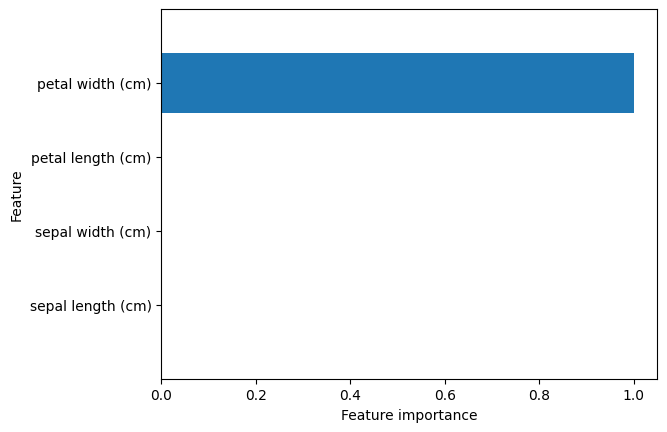

In [8]:
# plot feature importances
# assume the scikit-learn dataset has been imported as dataset

plot_feature_importances(tree)

## Regression

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

Xreg, yreg = mglearn.datasets.load_extended_boston()

Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg, random_state=0)

tree = DecisionTreeRegressor(max_depth=3).fit(Xreg_train, yreg_train)
linear_reg = LinearRegression().fit(Xreg_train, yreg_train)

print("Decision Tree R^2: {:.2f}".format(tree.score(Xreg_test, yreg_test)))
print("Linear Regression R^2: {:.2f}".format(linear_reg.score(Xreg_test, yreg_test)))

Decision Tree R^2: 0.64
Linear Regression R^2: 0.61


In [10]:
from sklearn.metrics import mean_squared_error

print("Decision Tree RMSE: {:.2f}".format(mean_squared_error(yreg_test, tree.predict(Xreg_test))))
print("Linear Regression RMSE: {:.2f}".format(mean_squared_error(yreg_test, linear_reg.predict(Xreg_test))))

Decision Tree RMSE: 29.33
Linear Regression RMSE: 32.07


# Random Forests


## Classification

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.933


In [12]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_depth=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.947
Accuracy on test set: 0.973


In [13]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_features=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.960


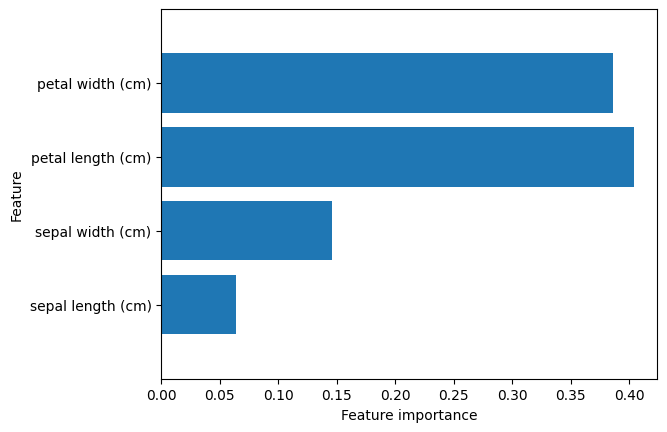

In [14]:
plot_feature_importances(forest)

# Gradient Boosted Decision Trees

## Classification

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.893


In [16]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.893


In [17]:
gbrt = GradientBoostingClassifier(n_estimators=10,random_state=0, learning_rate=0.9)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.893


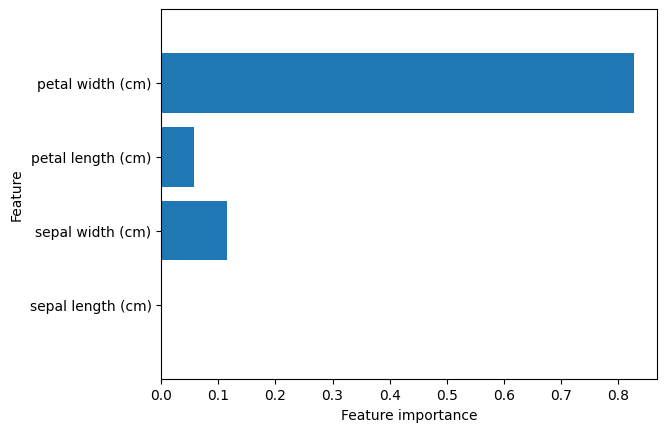

In [18]:
plot_feature_importances(gbrt)